In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import pandas as pd

race_master = pd.read_csv("../../data/master/excel_workbooks/race_results_master_for_power_bi.csv")
gt_ws       = pd.read_csv("../../data/sql_backup_queries_csv/csv/gt_ws_perf.csv")
top10       = pd.read_csv("../../data/master/top_10_yoy_ws_perf.csv")
dnf_summary = pd.read_csv("../../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")
diff_idx    = pd.read_csv("../../data/master/race_diff_index_revised.csv")

In [51]:
gt_series_ids = [50001, 10254, 895, 3753, 12057, 32444, 37038, 623, 29669]  # adjust as needed

race_master["is_wser"] = race_master["series_id"].eq(17002)
race_master["is_gt_race"] = race_master["series_id"].isin(gt_series_ids)

In [52]:
#### Clustered column: axis = year, legend = gender, values = n_entrants

In [53]:
ws = race_master[race_master["is_wser"]]

ws_field = (
    ws.groupby(["year", "gender"])
      .agg(n_entrants=("name", "nunique"))
      .reset_index()
)

In [54]:
ws_field = pd.DataFrame(ws_field)

In [55]:
ws_field

,year,gender,n_entrants
0,2022,F,92
1,2022,M,291
2,2023,F,82
3,2023,M,296
4,2024,F,98
5,2024,M,277
6,2025,F,101
7,2025,M,268


<Axes: xlabel='year', ylabel='n_entrants'>

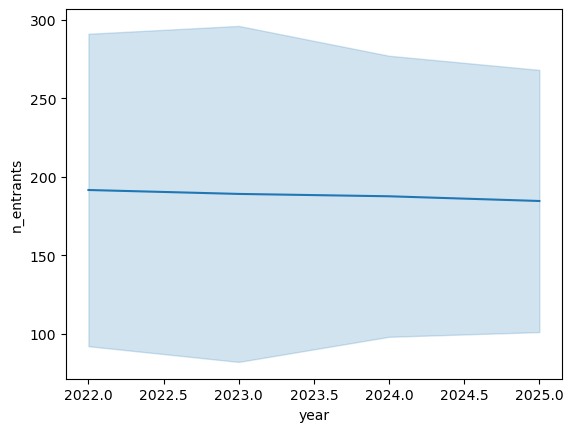

In [56]:
sns.lineplot(data = ws_field, x = 'year', y = 'n_entrants')

In [ ]:
#### Line Chart: axis = year, value = dnf_rate_pct, legend = race_name
#### DNF trends at western states and golden ticket races

In [57]:
ws_dnf = dnf_summary.query("race_name == 'Western States' and gender == 'Overall'")
gt_dnf = dnf_summary.query("race_type == 'Golden Ticket' and gender == 'Overall'")

In [58]:
#### Boxplot delta_percentile by gt_race_name
#### Table: GT race, number of GT recipients, WS finisher rate, median WS place/time

In [59]:
# Get GT field sizes by race & gender
gt_fields = (
    race_master[race_master["race_id"].isin(gt_ws["gt_race_id"].unique())]
      .groupby(["race_id", "gender"])
      .agg(field_size=("name", "nunique"))
      .reset_index()
)

gt_ws = gt_ws.merge(gt_fields, left_on=["gt_race_id", "gt_gender"],
                    right_on=["race_id", "gender"],
                    how="left")

# Compute percentiles (1 = last runner)
gt_ws["gt_percentile"] = gt_ws["ticket_position"] / gt_ws["field_size"]

# For WS percentile, we can use ws_rank and WS field size by gender
ws_fields = (
    race_master[race_master["is_wser"]]
      .groupby(["year", "gender"])
      .agg(ws_field_size=("name", "nunique"))
      .reset_index()
)

gt_ws = gt_ws.merge(ws_fields, left_on=["ws_year", "gt_gender"],
                    right_on=["year", "gender"],
                    how="left")

gt_ws["ws_percentile"] = gt_ws["ws_gender_rank"] / gt_ws["ws_field_size"]
gt_ws["delta_percentile"] = gt_ws["ws_percentile"] - gt_ws["gt_percentile"]

In [60]:
gt_ws

,gt_race_id,gt_race_name,gt_normalized_name,gt_gender,ticket_position,gt_time,gt_time_frac,ws_series_id,ws_race_id,ws_date,...,ws_race,race_id,gender_x,field_size,gt_percentile,year,gender_y,ws_field_size,ws_percentile,delta_percentile
0,62321,Festival Des Templiers,anne-lise le quere,F,2,12:53:51,0.537396,17002,87878,6/25/2022,...,Western States,62321,F,57,0.035088,2022,F,92,0.402174,0.367086
1,62321,Festival Des Templiers,vincent viet,M,1,10:52:25,0.453067,17002,87878,6/25/2022,...,Western States,62321,M,882,0.001134,2022,M,291,0.024055,0.022921
2,37542,The Canyons,leah yingling,F,2,10:24:50,0.433912,17002,87878,6/25/2022,...,Western States,37542,F,116,0.017241,2022,F,92,0.065217,0.047976
3,37542,The Canyons,aroa sio seijo,F,3,10:27:41,0.435891,17002,87878,6/25/2022,...,Western States,37542,F,116,0.025862,2022,F,92,0.130435,0.104573
4,37542,The Canyons,adam peterman,M,1,8:31:57,0.355521,17002,87878,6/25/2022,...,Western States,37542,M,409,0.002445,2022,M,291,0.003436,0.000991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,90708,Javelina,devon yanko,F,1,NaN,NaN,17002,97204,6/24/2023,...,NaN,90708,F,234,0.004274,2023,F,82,NaN,NaN
109,37338,Grindstone,devon yanko,F,2,NaN,NaN,17002,108752,6/29/2024,...,NaN,37338,F,79,0.025316,2024,F,98,NaN,NaN
110,115592,Black Canyon,will murray,M,2,NaN,NaN,17002,119682,6/28/2025,...,NaN,115592,M,703,0.002845,2025,M,268,NaN,NaN
111,115592,Black Canyon,lin chen,F,2,NaN,NaN,17002,119682,6/28/2025,...,NaN,115592,F,297,0.006734,2025,F,101,NaN,NaN


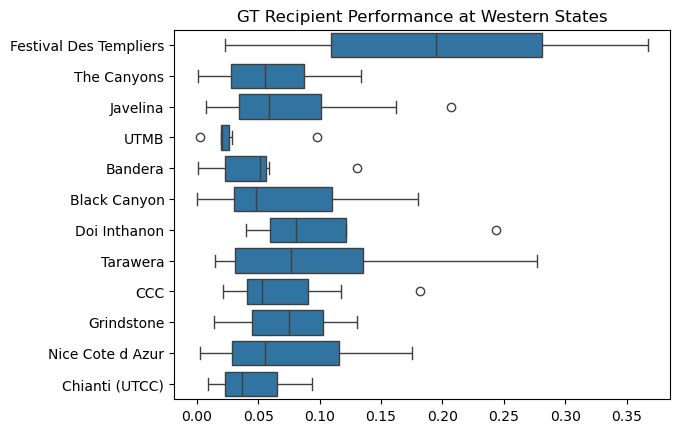

In [67]:
sns.boxplot(data = gt_ws, x = 'delta_percentile', y = 'gt_race_name')

# customize plot
plt.title('GT Recipient Performance at Western States')
plt.xlabel('')
plt.ylabel('')

plt.show()

# Slide idea:
# Title: “How Well Do Golden Ticket Winners Perform at Western States?”
# Takeaway sentence examples:
# “Golden Ticket winners generally remain in the top X% of their gender field at Western States.”
# “Recipients from [Race A] tend to overperform relative to their GT rank, while [Race B] winners often place lower at WS.”

In [49]:
print(gt_ws.columns)

Index(['gt_race_id', 'gt_race_name', 'gt_normalized_name', 'gt_gender',
       'ticket_position', 'gt_time', 'gt_time_frac', 'ws_series_id',
       'ws_race_id', 'ws_date', 'ws_year', 'ws_rank', 'ws_status',
       'nationality', 'ws_gender_rank', 'age_category', 'ws_time',
       'ws_time_frac', 'ws_race'],
      dtype='object')


In [15]:
gt_race_summary = (
    gt_ws.groupby("gt_race_name")
         .agg(
             n_recipients=("gt_normalized_name", "nunique"),
             ws_finisher_rate=("ws_status", lambda s: (s == "Finisher").mean()),
             median_delta_percentile=("delta_percentile", "median")
         )
         .reset_index()
)

In [16]:
gt_race_summary

,gt_race_name,n_recipients,ws_finisher_rate,median_delta_percentile
0,Bandera,8,0.875000,0.051616
1,Black Canyon,22,0.772727,0.047971
2,CCC,10,0.700000,0.053156
3,Chianti (UTCC),4,0.750000,0.036847
4,Doi Inthanon,8,0.625000,0.080489
5,Festival Des Templiers,3,0.666667,0.195004
6,Grindstone,4,0.750000,0.075158
7,Javelina,14,0.750000,0.058759
8,Nice Cote d Azur,4,0.750000,0.055423
9,Tarawera,7,1.000000,0.076515


In [ ]:
#### Plt difficulty_index vs ws_finisher_rate or median_delta_percentile
#### Scatter: x = difficulty_index, y = ws_finisher_rate, tooltip = gt_race_name, n_recipients

In [17]:
# Map race_id -> series_id (via master)
race_to_series = (
    race_master[["race_id", "series_id"]]
    .drop_duplicates()
)

gt_ws = gt_ws.merge(race_to_series, left_on="gt_race_id", right_on="race_id",
                    how="left", suffixes=("", "_map"))

gt_ws = gt_ws.merge(diff_idx, left_on="series_id", right_on="Series_ID",
                    how="left")

In [18]:
gt_ws

,gt_race_id,gt_race_name,gt_normalized_name,gt_gender,ticket_position,gt_time,gt_time_frac,ws_series_id,ws_race_id,ws_date,...,gender_y,ws_field_size,ws_percentile,delta_percentile,race_id_map,series_id,Series_ID,Race Name,Difficulty_Index,Race_Class
0,62321,Festival Des Templiers,anne-lise le quere,F,2,12:53:51,0.537396,17002,87878,6/25/2022,...,F,92,0.402174,0.367086,62321,623,623,Festival Des Templiers,52.9,100K
1,62321,Festival Des Templiers,vincent viet,M,1,10:52:25,0.453067,17002,87878,6/25/2022,...,M,291,0.024055,0.022921,62321,623,623,Festival Des Templiers,52.9,100K
2,37542,The Canyons,leah yingling,F,2,10:24:50,0.433912,17002,87878,6/25/2022,...,F,92,0.065217,0.047976,37542,3753,3753,The Canyons,50.6,100K
3,37542,The Canyons,aroa sio seijo,F,3,10:27:41,0.435891,17002,87878,6/25/2022,...,F,92,0.130435,0.104573,37542,3753,3753,The Canyons,50.6,100K
4,37542,The Canyons,adam peterman,M,1,8:31:57,0.355521,17002,87878,6/25/2022,...,M,291,0.003436,0.000991,37542,3753,3753,The Canyons,50.6,100K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,90708,Javelina,devon yanko,F,1,NaN,NaN,17002,97204,6/24/2023,...,F,82,NaN,NaN,90708,12057,12057,Javelina Jundred,31.6,100M
109,37338,Grindstone,devon yanko,F,2,NaN,NaN,17002,108752,6/29/2024,...,F,98,NaN,NaN,37338,37038,37038,Grindstone,70.9,100K
110,115592,Black Canyon,will murray,M,2,NaN,NaN,17002,119682,6/28/2025,...,M,268,NaN,NaN,115592,10254,10254,Black Canyon,5.0,100K
111,115592,Black Canyon,lin chen,F,2,NaN,NaN,17002,119682,6/28/2025,...,F,101,NaN,NaN,115592,10254,10254,Black Canyon,5.0,100K


In [ ]:
#### Distribution of delta_rank (median, IQR)
#### Column showing: % of Top-10 who return nect year
#### Among returners: % repeat Top-10, % finish 11–25, % >25, % DNF.

In [19]:
# Who came back at all?
top10["returned"] = top10["next_status"].ne("DNS")

# Who repeated Top-10?
top10["repeat_top10"] = top10["next_rank"].le(10)

summary = {
    "n_top10_first": len(top10),
    "n_returned": top10["returned"].sum(),
    "n_repeat_top10": top10["repeat_top10"].sum(),
    "return_rate": top10["returned"].mean(),
    "repeat_rate_among_returners": (top10["repeat_top10"].sum() /
                                    top10["returned"].sum())
}

In [20]:
returners = top10[top10["returned"] & top10["next_rank"].notna()].copy()
returners["delta_rank"] = returners["next_rank"] - returners["original_rank"]

In [21]:
returners

,runner_name,original_gender,original_race,original_year,original_rank,original_time,next_year,next_rank,next_time,next_status,returned,repeat_top10,delta_rank
0,pam smith,F,Western States,2013,1,0.775937,2014.0,4.0,0.799097,Finisher,True,True,3.0
1,nikki kimball,F,Western States,2013,2,0.806748,2014.0,5.0,0.827442,Finisher,True,True,3.0
3,meghan canfield,F,Western States,2013,4,0.813079,2014.0,8.0,0.885278,Finisher,True,True,4.0
7,denise bourassa,F,Western States,2013,8,0.905984,2014.0,7.0,0.846875,Finisher,True,True,-1.0
11,rob krar,M,Western States,2013,2,0.640336,2014.0,1.0,0.620394,Finisher,True,True,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,emily hawgood,F,Western States,2024,4,0.700498,2025.0,10.0,0.757697,Finisher,True,True,6.0
205,ida nilsson,F,Western States,2024,6,0.706157,2025.0,4.0,0.708889,Finisher,True,True,-2.0
213,daniel jones,M,Western States,2024,4,0.605891,2025.0,5.0,0.608530,Finisher,True,True,1.0
214,caleb olson,M,Western States,2024,5,0.611250,2025.0,1.0,0.591262,Finisher,True,True,-4.0


In [26]:
import pandas as pd

# --- Load data ---
gt_ws = pd.read_csv("../../data/sql_backup_queries_csv/csv/gt_ws_perf.csv")
master = pd.read_csv("../../data/master/excel_workbooks/race_results_master_for_power_bi.csv")
diff = pd.read_csv("../../data/master/race_diff_index_revised.csv")

# Only finishers for defining field sizes
master_finishers = master[master["status"] == "Finisher"].copy()

# --- 1) GT gender field sizes per race & gender ---
gt_fields = (
    master_finishers[master_finishers["race_id"].isin(gt_ws["gt_race_id"].unique())]
    .groupby(["race_id", "gender"])
    .agg(gt_field_size=("name", "nunique"))
    .reset_index()
)

gt_ws2 = gt_ws.merge(
    gt_fields,
    left_on=["gt_race_id", "gt_gender"],
    right_on=["race_id", "gender"],
    how="left"
)

# --- 2) WS gender field sizes per year & gender (finishers only) ---
ws_finishers = master_finishers[master_finishers["race_name"] == "Western States"].copy()

ws_fields = (
    ws_finishers
    .groupby(["year", "gender"])
    .agg(ws_field_size=("name", "nunique"))
    .reset_index()
)

gt_ws2 = gt_ws2.merge(
    ws_fields,
    left_on=["ws_year", "gt_gender"],
    right_on=["year", "gender"],
    how="left"
)

# --- 3) Percentiles & delta ---
gt_ws2["gt_gender_percentile"] = gt_ws2["ticket_position"] / gt_ws2["gt_field_size"]
gt_ws2["ws_gender_percentile"] = gt_ws2["ws_gender_rank"] / gt_ws2["ws_field_size"]
gt_ws2["delta_gender_percentile"] = (
    gt_ws2["ws_gender_percentile"] - gt_ws2["gt_gender_percentile"]
)

# Finisher flag at WS
gt_ws2["ws_is_finisher"] = (gt_ws2["ws_status"] == "Finisher").astype(int)

# --- 4) Map GT races to difficulty index ---
race_series_map = (
    master[master["race_id"].isin(gt_ws["gt_race_id"].unique())]
    [["race_id", "series_id", "race_name"]]
    .drop_duplicates()
)

race_series_diff = race_series_map.merge(
    diff,
    left_on="series_id",
    right_on="Series_ID",
    how="left"
)

gt_race_diff = race_series_diff[
    ["race_id", "Race Name", "Difficulty_Index", "Race_Class"]
].drop_duplicates()

gt_ws3 = gt_ws2.merge(
    gt_race_diff,
    left_on="gt_race_id",
    right_on="race_id",
    how="left"
)

# --- 5) Aggregate by GT race ---
race_summary = (
    gt_ws3
    .groupby(["gt_race_name", "Difficulty_Index", "Race_Class"])
    .agg(
        n_recipients=("gt_normalized_name", "nunique"),
        ws_finisher_rate=("ws_is_finisher", "mean"),
        median_delta_gender_percentile=("delta_gender_percentile", "median")
    )
    .reset_index()
)

# Nice rounding for display
race_summary_display = race_summary.copy()
for col in ["Difficulty_Index", "ws_finisher_rate", "median_delta_gender_percentile"]:
    race_summary_display[col] = race_summary_display[col].round(3)

race_summary_display.sort_values("Difficulty_Index", ascending=False).reset_index(drop = True)

,gt_race_name,Difficulty_Index,Race_Class,n_recipients,ws_finisher_rate,median_delta_gender_percentile
0,UTMB,100.0,100M,6,1.000,0.024
1,Doi Inthanon,91.8,100M,8,0.625,0.095
2,Grindstone,70.9,100K,4,0.750,0.091
3,CCC,67.1,100K,10,0.700,0.077
4,Festival Des Templiers,52.9,100K,3,0.667,0.261
5,The Canyons,50.6,100K,19,0.900,0.068
6,Nice Cote d Azur,41.4,100K,4,0.750,0.068
7,Chianti (UTCC),41.0,100K,4,0.750,0.049
8,Tarawera,35.9,100K,7,1.000,0.101
9,Javelina,31.6,100M,14,0.750,0.071


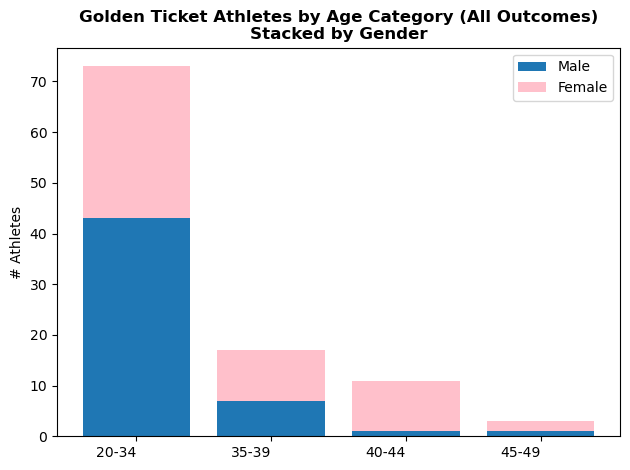

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

# Keep anyone with age & gender (Finisher, DNF, DNS all included)
age_df = df[~df["age_category"].isna() & ~df["gt_gender"].isna()].copy()

# Count by age category + gender
gender_split = (
    age_df.groupby(["age_category", "gt_gender"])["gt_gender"]
          .count()
          .rename("count")
          .unstack(fill_value=0)
)

# Make sure both columns exist even if one gender missing in a category
for g in ["M", "F"]:
    if g not in gender_split.columns:
        gender_split[g] = 0

# Sort by total count, most common age groups first
gender_split["total"] = gender_split["M"] + gender_split["F"]
gender_split = gender_split.sort_values("total", ascending=False)

# --- Plot: Stacked bar chart ---
plt.figure()

x = np.arange(len(gender_split))
m_vals = gender_split["M"].values
f_vals = gender_split["F"].values

plt.bar(x, m_vals, label="Male")
plt.bar(x, f_vals, bottom=m_vals, label="Female", color = 'pink')

plt.xticks(x, gender_split.index, rotation=0, ha="right")
plt.ylabel("# Athletes")
plt.xlabel("")
plt.title("Golden Ticket Athletes by Age Category (All Outcomes)\nStacked by Gender", fontweight = 'bold')
plt.legend()
plt.tight_layout()

plt.savefig('../python_images/gt_athlete_by_age_all_outcomes.png', dpi = 300)

plt.show()

In [86]:
age_df

,series_id,gt_race_id,diff_index,gt_race_name,gt_normalized_name,gt_gender,ticket_position,gt_gender_rank,gt_time,gt_hour,...,ws_status,nationality,ws_gender_rank,age_category,ws_time,ws_hour,ws_norm,delta_norm,delta_norm_pct,ws_race
0,32444,23444,41.42,Nice Cote d Azur,jim walmsley,M,1,1,11:21:05,11.351389,...,Finisher,USA,1.0,20-34,14:13:45,14.229167,0.183130,-0.090926,-33.177989,Western States
1,29669,126002,41.02,Chianti (UTCC),kilian jornet burgada,M,1,2,10:27:27,10.457500,...,Finisher,NOR,3.0,35-39,14:19:22,14.322778,0.184334,-0.070602,-27.694053,Western States
2,3753,37544,50.60,The Canyons,rod farvard,M,1,1,8:44:30,8.741667,...,Finisher,USA,2.0,20-34,14:24:15,14.404167,0.185382,0.012622,7.305849,Western States
3,10254,104108,5.00,Black Canyon,hayden hawks,M,1,1,7:30:18,7.505000,...,Finisher,USA,3.0,20-34,14:24:31,14.408611,0.185439,-1.315561,-87.645636,Western States
4,12057,112165,31.63,Javelina,jeff mogavero,M,2,2,12:54:31,12.908611,...,Finisher,USA,4.0,20-34,14:30:11,14.503056,0.186655,-0.221458,-54.264001,Western States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,141,141024,67.10,CCC,rosanna buchauer,F,2,3,12:16:55,12.281944,...,DNF,DEU,NaN,35-39,NaN,NaN,NaN,NaN,NaN,Western States
100,12057,112165,31.63,Javelina,david roche,M,1,1,12:45:04,12.751111,...,DNF,USA,NaN,35-39,NaN,NaN,NaN,NaN,NaN,Western States
101,12057,112165,31.63,Javelina,riley brady,F,1,1,14:19:01,14.316944,...,DNF,USA,NaN,20-34,NaN,NaN,NaN,NaN,NaN,Western States
102,10254,115592,5.00,Black Canyon,tara dower,F,1,2,8:25:08,8.418889,...,DNF,USA,NaN,20-34,NaN,NaN,NaN,NaN,NaN,Western States


In [72]:
overall_counts = (
    age_df.groupby("age_category")["age_category"]
          .count()
          .rename("count")
          .sort_values(ascending=False)
)

overall_counts

age_category
20-34    65
35-39    13
40-44    10
45-49     3
Name: count, dtype: int64

In [87]:
gender_split = (
    age_df.groupby(["age_category", "gt_gender"])["gt_gender"]
          .count()
          .rename("count")
          .unstack(fill_value=0)
          .sort_values(by=["M","F"], ascending=False)
)

gender_split

gt_gender,F,M
age_category,,
20-34,30,43
35-39,10,7
40-44,10,1
45-49,2,1


In [74]:
combined = gender_split.copy()
combined["total"] = combined.sum(axis=1)
combined["pct_male"] = (combined["M"] / combined["total"]).round(3)
combined["pct_female"] = (combined["F"] / combined["total"]).round(3)

combined.sort_values("total", ascending=False)

gt_gender,F,M,total,pct_male,pct_female
age_category,,,,,
20-34,25,40,65,0.615,0.385
35-39,7,6,13,0.462,0.538
40-44,9,1,10,0.100,0.900
45-49,2,1,3,0.333,0.667


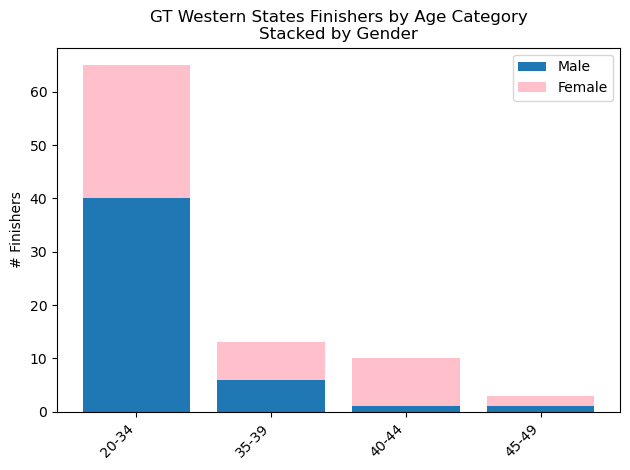

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load

# Ensure consistent gender columns even if one is missing in a category
for g in ["M", "F"]:
    if g not in gender_split.columns:
        gender_split[g] = 0

# Sort by total finishers (largest → smallest)
gender_split["total"] = gender_split["M"] + gender_split["F"]
gender_split = gender_split.sort_values("total", ascending=False)

# Plot (stacked bar)
plt.figure()

x = np.arange(len(gender_split))
m_vals = gender_split["M"].values
f_vals = gender_split["F"].values

plt.bar(x, m_vals, label="Male")
plt.bar(x, f_vals, bottom=m_vals, label="Female", color = 'pink')

# Axis labels & formatting
plt.xticks(x, gender_split.index, rotation=45, ha="right")
plt.ylabel("# Finishers")
plt.xlabel("")
plt.title("GT Western States Finishers by Age Category\nStacked by Gender")
plt.legend()
plt.tight_layout()

plt.savefig('../python_images/gt_ws_finish_age_category

plt.show()

In [94]:
import pandas as pd

df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

finish_df = df[
    (df["ws_status"] == "Finisher") &
    (~df["age_category"].isna()) &
    (~df["gt_gender"].isna()) &
    (~df["ws_gender_rank"].isna())
].copy()

In [95]:
median_rank = (
    finish_df.groupby(["age_category", "gt_gender"])["ws_gender_rank"]
             .median()
             .rename("median_ws_gender_rank")
             .reset_index()
             .sort_values(["age_category", "gt_gender"])
)

median_rank

,age_category,gt_gender,median_ws_gender_rank
0,20-34,F,10.0
1,20-34,M,10.0
2,35-39,F,5.0
3,35-39,M,6.5
4,40-44,F,12.0
5,40-44,M,10.0
6,45-49,F,16.5
7,45-49,M,6.0


In [97]:
counts = (
    finish_df.groupby(["age_category", "gt_gender"])["gt_gender"]
             .count()
             .rename("finishers")
             .reset_index()
)

rank_with_counts = median_rank.merge(counts, on=["age_category","gt_gender"])
rank_with_counts

,age_category,gt_gender,median_ws_gender_rank,finishers
0,20-34,F,10.0,25
1,20-34,M,10.0,40
2,35-39,F,5.0,7
3,35-39,M,6.5,6
4,40-44,F,12.0,9
5,40-44,M,10.0,1
6,45-49,F,16.5,2
7,45-49,M,6.0,1


In [98]:
finish_df["ws_pct_rank"] = finish_df["ws_gender_rank"] / 369  # ~ field size
finish_df["top_5pct"] = finish_df["ws_pct_rank"] <= 0.05

top5 = (
    finish_df.groupby(["age_category","gt_gender"])["top_5pct"]
             .mean()
             .rename("pct_top_5pct")
             .reset_index()
)

rank_full = rank_with_counts.merge(top5, on=["age_category","gt_gender"])
rank_full

,age_category,gt_gender,median_ws_gender_rank,finishers,pct_top_5pct
0,20-34,F,10.0,25,0.880000
1,20-34,M,10.0,40,0.825000
2,35-39,F,5.0,7,1.000000
3,35-39,M,6.5,6,0.833333
4,40-44,F,12.0,9,0.888889
5,40-44,M,10.0,1,1.000000
6,45-49,F,16.5,2,0.500000
7,45-49,M,6.0,1,1.000000


In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

# Keep finishers with needed info
finish_df = df[
    (df["ws_status"]=="Finisher") &
    (~df["age_category"].isna()) &
    (~df["gt_gender"].isna()) &
    (~df["ws_gender_rank"].isna())
].copy()

# % rank in gender field (approximate field size = 369)
finish_df["ws_pct_rank"] = finish_df["ws_gender_rank"] / 369
finish_df["top_5pct"] = finish_df["ws_pct_rank"] <= 0.05

# Median rank, counts, and % top-5%
summary = (
    finish_df.groupby(["age_category","gt_gender"])
             .agg(
                 finishers=("ws_gender_rank","count"),
                 median_ws_gender_rank=("ws_gender_rank","median"),
                 pct_top_5pct=("top_5pct","mean")
             )
             .reset_index()
)

# Format percentages
summary["pct_top_5pct"] = (summary["pct_top_5pct"]*100).round(1).astype(str) + "%"

# Sort largest → smallest age groups
summary = summary.sort_values("finishers", ascending=False)

summary

,age_category,gt_gender,finishers,median_ws_gender_rank,pct_top_5pct
1,20-34,M,40,10.0,82.5%
0,20-34,F,25,10.0,88.0%
4,40-44,F,9,12.0,88.9%
2,35-39,F,7,5.0,100.0%
3,35-39,M,6,6.5,83.3%
6,45-49,F,2,16.5,50.0%
5,40-44,M,1,10.0,100.0%
7,45-49,M,1,6.0,100.0%


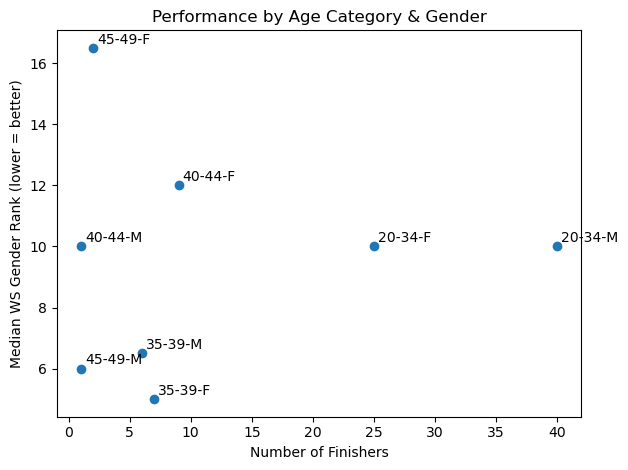

In [100]:
import matplotlib.pyplot as plt

# convert table into plotting arrays
x = summary["finishers"].values
y = summary["median_ws_gender_rank"].values
labels = summary["age_category"] + "-" + summary["gt_gender"]

plt.figure()
plt.scatter(x, y)

# add labels
for xi, yi, label in zip(x, y, labels):
    plt.annotate(label, (xi, yi), xytext=(3,3), textcoords="offset points")

plt.xlabel("Number of Finishers")
plt.ylabel("Median WS Gender Rank (lower = better)")
plt.title("Performance by Age Category & Gender")
plt.tight_layout()
plt.show()

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('../../data/master/excel_workbooks/gt_ws_perf_for_power_bi.csv')

# Keep only athletes with WS finish times
finishers = df[df['ws_status']=="Finisher"].copy()

# --- Normalize by gender winners at each race ---
# GT normalization
gt_win = (
    finishers.groupby(['gt_race_name','gt_gender'])['gt_time']
    .transform('min')
)

finishers['gt_norm_frac'] = finishers['gt_time'] / gt_win

# WS normalization
ws_win = (
    finishers.groupby(['ws_year','gt_gender'])['ws_time']
    .transform('min')
)

finishers['ws_norm_frac'] = finishers['ws_time'] / ws_win

In [107]:
finishers

,gt_race_id,gt_race_name,gt_normalized_name,gt_gender,ticket_position,gt_time,ws_series_id,ws_race_id,ws_date,ws_year,ws_rank,ws_status,nationality,ws_gender_rank,age_category,ws_time,ws_race,gt_norm_frac,ws_norm_frac
0,62321,Festival Des Templiers,anne-lise le quere,F,2,0.537396,17002,87878,2022-06-25,2022,173.0,Finisher,FRA,37.0,20-34,1.146690,Western States,1.000000,1.520753
1,62321,Festival Des Templiers,vincent viet,M,1,0.453067,17002,87878,2022-06-25,2022,7.0,Finisher,FRA,7.0,35-39,0.686366,Western States,1.000000,1.081601
2,37542,The Canyons,leah yingling,F,2,0.433912,17002,87878,2022-06-25,2022,21.0,Finisher,USA,6.0,20-34,0.772581,Western States,1.057725,1.024606
3,37542,The Canyons,aroa sio seijo,F,3,0.435891,17002,87878,2022-06-25,2022,32.0,Finisher,ESP,12.0,40-44,0.846146,Western States,1.062549,1.122168
4,37542,The Canyons,adam peterman,M,1,0.355521,17002,87878,2022-06-25,2022,1.0,Finisher,USA,1.0,20-34,0.634583,Western States,1.009763,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,73545,The Canyons,marianne hogan,F,1,0.410231,17002,119682,2025-06-28,2025,13.0,Finisher,CAN,3.0,35-39,0.702060,Western States,1.000000,1.013738
100,73545,The Canyons,keely henninger,F,2,0.415394,17002,119682,2025-06-28,2025,21.0,Finisher,USA,9.0,20-34,0.748194,Western States,1.012583,1.080353
101,73545,The Canyons,erin clark,F,3,0.416030,17002,119682,2025-06-28,2025,28.0,Finisher,USA,11.0,20-34,0.786366,Western States,1.014135,1.135470
102,141024,CCC,adam peterman,M,2,0.436690,17002,119682,2025-06-28,2025,68.0,Finisher,USA,49.0,20-34,0.964919,Western States,1.023464,1.616869


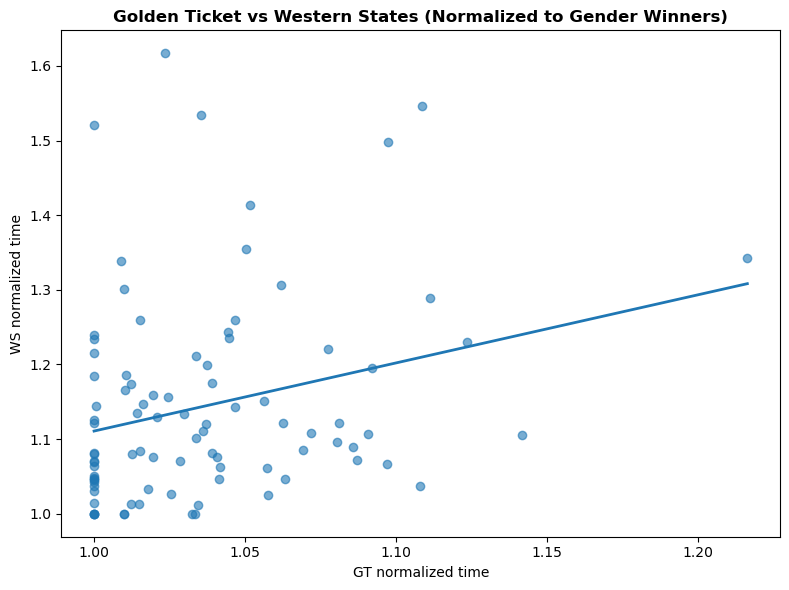

Linear fit: y = 0.197 + 0.913 x   (r = 0.267, p = 0.0105)


In [141]:
from scipy.stats import linregress

# Keep WS finishers only
finishers = df[df['ws_status'] == 'Finisher'].copy()

# Normalize vs gender winners (within GT race and WS year)
# If gt_time_frac / ws_time_frac are already "fraction of winner", this will just anchor at 1.0 again.
gt_win = finishers.groupby(['gt_race_name','gt_gender'])['gt_time'].transform('min')
ws_win = finishers.groupby(['ws_year','gt_gender'])['ws_time'].transform('min')

finishers['gt_norm_frac'] = finishers['gt_time'] / gt_win
finishers['ws_norm_frac'] = finishers['ws_time'] / ws_win

# Drop NaNs/Infs
x = finishers['gt_norm_frac'].to_numpy(dtype=float)
y = finishers['ws_norm_frac'].to_numpy(dtype=float)
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Scatter
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6)

# Regression line
slope, intercept, r, p, stderr = linregress(x, y)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit
plt.plot(x_fit, y_fit, linewidth=2)

# # y = x reference (equal relative performance)
# lo = min(x.min(), y.min())
# hi = max(x.max(), y.max())
# plt.plot([lo, hi], [lo, hi], linestyle='--', linewidth=1)

plt.title("Golden Ticket vs Western States (Normalized to Gender Winners)", fontweight = 'bold')
plt.xlabel("GT normalized time")
plt.ylabel("WS normalized time")
plt.tight_layout()

plt.savefig('../python_images/gt_ws_scatter_normalized.png', dpi = 300)

plt.show()

print(f"Linear fit: y = {intercept:.3f} + {slope:.3f} x   (r = {r:.3f}, p = {p:.3g})")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

finishers = df[df['ws_status']=="Finisher"].copy()

# Normalize
gt_win = finishers.groupby(['gt_race_name','gt_gender'])['gt_time'].transform('min')
ws_win = finishers.groupby(['ws_year','gt_gender'])['ws_time'].transform('min')

finishers['gt_norm_frac'] = finishers['gt_time'] / gt_win
finishers['ws_norm_frac'] = finishers['ws_time'] / ws_win

# Drop bad rows
finishers = finishers.replace([np.inf, -np.inf], np.nan).dropna(subset=['gt_norm_frac', 'ws_norm_frac'])

# Scatter
plt.figure(figsize=(10,7))
plt.scatter(finishers['gt_norm_frac'], finishers['ws_norm_frac'], alpha=0.6)

# # Trend line
# slope, intercept, r, p, stderr = linregress(finishers['gt_norm_frac'], finishers['ws_norm_frac'])
# x_fit = np.linspace(finishers['gt_norm_frac'].min(), finishers['gt_norm_frac'].max(), 200)
# y_fit = intercept + slope * x_fit
# plt.plot(x_fit, y_fit, linewidth=2)

# Reference line y=x
lo = min(finishers['gt_norm_frac'].min(), finishers['ws_norm_frac'].min())
hi = max(finishers['gt_norm_frac'].max(), finishers['ws_norm_frac'].max())
plt.plot([lo,hi], [lo,hi], linestyle='--', linewidth=1)

# --- Highlight over/under performers ---
over = finishers[finishers['ws_norm_frac'] < 1.05]
under = finishers[finishers['ws_norm_frac'] > 1.25]

# # Label a few outliers (avoid clutter)
# for _, row in over.sample(min(5, len(over))).iterrows():
#     plt.text(row['gt_norm_frac'], row['ws_norm_frac'], row['gt_normalized_name'], fontsize=8)

# for _, row in under.sample(min(5, len(under))).iterrows():
#     plt.text(row['gt_norm_frac'], row['ws_norm_frac'], row['gt_normalized_name'], fontsize=8)

plt.title("GT vs WS Performance\n(Points below dashed line = better WS performance)")
plt.xlabel("GT normalized time")
plt.ylabel("WS normalized time")
plt.tight_layout()

plt.savefig('../python_images/gt_ws_scatter_normalized.png', dpi = 300)

plt.show()

print(f"Correlation r={r:.3f}, p={p:.003f}")

NameError: name 'df' is not defined

In [174]:
finishers.head(50)

,gt_race_id,gt_race_name,gt_normalized_name,gt_gender,ticket_position,gt_time,ws_series_id,ws_race_id,ws_date,ws_year,ws_rank,ws_status,nationality,ws_gender_rank,age_category,ws_time,ws_race,iso3,gt_norm_frac,ws_norm_frac
0,62321,Festival Des Templiers,anne-lise le quere,F,2,0.537396,17002,87878,2022-06-25,2022,173.0,Finisher,FRA,37.0,20-34,1.146690,Western States,FRA,1.000000,1.520753
1,62321,Festival Des Templiers,vincent viet,M,1,0.453067,17002,87878,2022-06-25,2022,7.0,Finisher,FRA,7.0,35-39,0.686366,Western States,FRA,1.000000,1.081601
2,37542,The Canyons,leah yingling,F,2,0.433912,17002,87878,2022-06-25,2022,21.0,Finisher,USA,6.0,20-34,0.772581,Western States,USA,1.057725,1.024606
3,37542,The Canyons,aroa sio seijo,F,3,0.435891,17002,87878,2022-06-25,2022,32.0,Finisher,ESP,12.0,40-44,0.846146,Western States,ESP,1.062549,1.122168
4,37542,The Canyons,adam peterman,M,1,0.355521,17002,87878,2022-06-25,2022,1.0,Finisher,USA,1.0,20-34,0.634583,Western States,USA,1.009763,1.000000
6,37542,The Canyons,rod farvard,M,3,0.386354,17002,87878,2022-06-25,2022,58.0,Finisher,USA,41.0,20-34,0.950590,Western States,USA,1.097337,1.497975
7,81876,Javelina,brittany peterson,F,2,0.657905,17002,87878,2022-06-25,2022,47.0,Finisher,USA,16.0,35-39,0.927859,Western States,USA,1.123313,1.230537
8,14221,UTMB,ludovic pommeret,M,1,0.901898,17002,87878,2022-06-25,2022,6.0,Finisher,FRA,6.0,45-49,0.680579,Western States,FRA,1.086958,1.072481
9,22,Bandera,jonathan rea,M,1,0.340278,17002,87878,2022-06-25,2022,24.0,Finisher,USA,16.0,20-34,0.786343,Western States,USA,1.000000,1.239148
10,22,Bandera,tyler fox,M,2,0.343669,17002,87878,2022-06-25,2022,30.0,Finisher,USA,19.0,20-34,0.825775,Western States,USA,1.009966,1.301288


In [122]:
race_corr = (
    finishers.groupby('gt_race_name')
    .apply(lambda g: g[['gt_norm_frac','ws_norm_frac']].corr().iloc[0,1])
    .rename('corr_gt_ws')
    .sort_values(ascending=False)
)

C:\Users\user\AppData\Local\Temp\ipykernel_36504\4193561311.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[['gt_norm_frac','ws_norm_frac']].corr().iloc[0,1])


In [124]:
race_corr

gt_race_name
Chianti (UTCC)            0.960714
Grindstone                0.957966
Javelina                  0.595264
Tarawera                  0.569037
The Canyons               0.480055
UTMB                      0.427045
Nice Cote d Azur          0.379290
Doi Inthanon              0.156768
Bandera                   0.065306
CCC                       0.013533
Black Canyon             -0.024901
Festival Des Templiers         NaN
Name: corr_gt_ws, dtype: float64

In [123]:
delta_by_race = (
    finishers.assign(delta = finishers.ws_norm_frac - finishers.gt_norm_frac)
             .groupby('gt_race_name')['delta']
             .median()
             .sort_values()
)

In [125]:
delta_by_race

gt_race_name
UTMB                      0.014030
Black Canyon              0.037534
Chianti (UTCC)            0.044722
CCC                       0.050678
Javelina                  0.063187
The Canyons               0.072009
Bandera                   0.102809
Tarawera                  0.120274
Grindstone                0.121704
Nice Cote d Azur          0.162375
Doi Inthanon              0.184999
Festival Des Templiers    0.301177
Name: delta, dtype: float64

In [126]:
# Top 10% of gender field
finishers['ws_top10pct'] = finishers['ws_norm_frac'] <= 1.10

race_summary = (
    finishers.groupby('gt_race_name')
    .agg(
        athletes     = ('gt_race_name','size'),
        top10pct     = ('ws_top10pct','mean'),
        median_ws    = ('ws_norm_frac','median'),
        dnf_count    = ('ws_status', lambda x: (x=='DNF').sum())
    )
    .sort_values('top10pct', ascending=False)
)

In [127]:
race_summary

,athletes,top10pct,median_ws,dnf_count
gt_race_name,,,,
UTMB,6,0.833333,1.076152,0
Chianti (UTCC),3,0.666667,1.044722,0
Javelina,12,0.583333,1.072982,0
Black Canyon,17,0.529412,1.089279,0
Festival Des Templiers,2,0.500000,1.301177,0
Bandera,7,0.428571,1.175684,0
CCC,7,0.428571,1.108115,0
The Canyons,18,0.388889,1.121936,0
Tarawera,8,0.375000,1.182165,0


In [135]:
finishers = df[df['ws_status']=="Finisher"].copy()

In [136]:
race_counts = (
    df.groupby('gt_race_name')
      .agg(
          total = ('gt_race_name','size'),
          finishers = ('ws_status', lambda x: (x=='Finisher').sum()),
          dnfs = ('ws_status', lambda x: (x=='DNF').sum()),
          dns = ('ws_status', lambda x: (x=='DNS').sum())
      )
)

In [149]:
course_map = {
    'Black Canyon': 'Fast/Runnable Desert',
    'Javelina': 'Fast/Runnable Desert',
    'Bandera': 'Fast/Runnable Desert',
    
    'The Canyons': 'California/WS-Style',
    'Grindstone': 'California/WS-Style',
    'Festival Des Templiers': 'California/WS-Style',

    'UTMB': 'Technical/Alpine Europe',
    'CCC': 'Technical/Alpine Europe',
    'Nice Cote d Azur': 'Technical/Alpine Europe',
    'Chianti (UTCC)': 'Technical/Alpine Europe',

    'Tarawera': 'Humid/Tropical Mountain',
    'Doi Inthanon': 'Humid/Tropical Mountain'
}

df['course_type'] = df['gt_race_name'].map(course_map)


In [139]:
df = pd.read_csv('../../data/master/excel_workbooks/gt_ws_perf_for_power_bi.csv')

In [150]:
import numpy as np

# 1) Compute normalized frac within each GT race (for finishers)
df['gt_norm_frac'] = df.groupby(
    ['gt_race_name','gt_gender']
)['gt_time'].transform(lambda x: x / x.min())

# 2) Compute normalized frac within each WS race (for finishers)
# WS finishers only — DNFs will be NaN
finish_mask = df['ws_status'] == "Finisher"
df.loc[finish_mask, 'ws_norm_frac'] = df[finish_mask].groupby(
    ['ws_year','gt_gender']
)['ws_time'].transform(lambda x: x / x.min())

# Still keep DNFs and DNS rows — just leave ws_norm_frac NaN there
# (much better than 0 or 1, avoids misleading math)

# 3) Finishers only for performance metrics
finishers = df[df['ws_status'] == 'Finisher'].copy()
finishers['delta'] = finishers['ws_norm_frac'] - finishers['gt_norm_frac']
finishers['ws_top10pct'] = finishers['ws_norm_frac'] <= 1.10

group_perf = (
    finishers.groupby('course_type')
        .agg(
            n_finishers=('gt_normalized_name','count'),
            median_delta=('delta','median'),
            pct_top10pct=('ws_top10pct','mean')
        )
)

# 4) Completion stats for full dataset
group_completion = (
    df.groupby('course_type')
      .agg(
          total=('gt_normalized_name','count'),
          finishers=('ws_status', lambda x: (x=='Finisher').sum()),
          dnfs=('ws_status', lambda x: (x=='DNF').sum()),
          dns=('ws_status', lambda x: (x=='DNS').sum())
      )
)

summary = group_completion.join(group_perf)
summary['finish_rate'] = summary['finishers'] / summary['total']
summary = summary.sort_values('total', ascending=False)

summary

,total,finishers,dnfs,dns,n_finishers,median_delta,pct_top10pct,finish_rate
course_type,,,,,,,,
Fast/Runnable Desert,46,36,5,5,36,0.044637,0.527778,0.782609
California/WS-Style,27,23,1,3,23,0.081601,0.391304,0.851852
Technical/Alpine Europe,24,19,4,1,19,0.044722,0.578947,0.791667
Humid/Tropical Mountain,16,13,3,0,13,0.143465,0.307692,0.812500


                         total  finishers  dnfs  dns  n_finishers  \
course_type                                                         
Fast/Runnable Desert        46         36     5    5           36   
California/WS-Style         24         21     1    2           21   
Technical/Alpine Europe     23         18     3    2           18   
Humid/Tropical Mountain     20         16     4    0           16   

                         median_delta  pct_top10pct  finish_rate  
course_type                                                       
Fast/Runnable Desert         0.044637      0.333333     0.782609  
California/WS-Style          0.074752      0.238095     0.875000  
Technical/Alpine Europe      0.057523      0.222222     0.782609  
Humid/Tropical Mountain      0.121226      0.187500     0.800000  


C:\Users\user\AppData\Local\Temp\ipykernel_23612\3023122879.py:114: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(plt.gca().get_xticklabels())


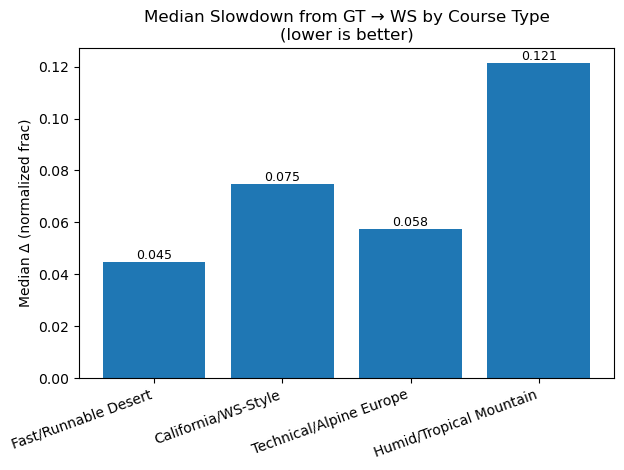

C:\Users\user\AppData\Local\Temp\ipykernel_23612\3023122879.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(plt.gca().get_xticklabels())


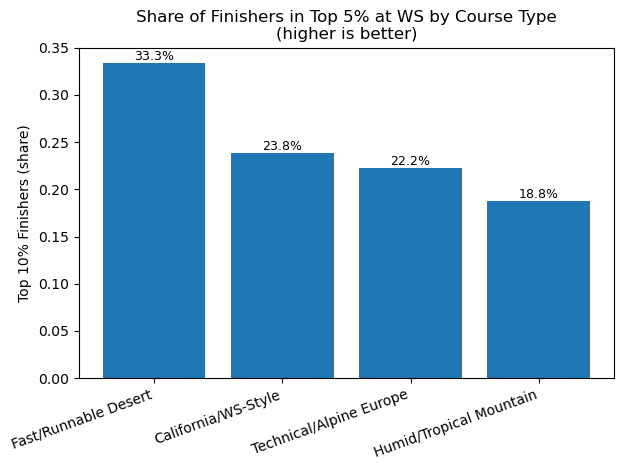

C:\Users\user\AppData\Local\Temp\ipykernel_23612\3023122879.py:162: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(plt.gca().get_xticklabels())


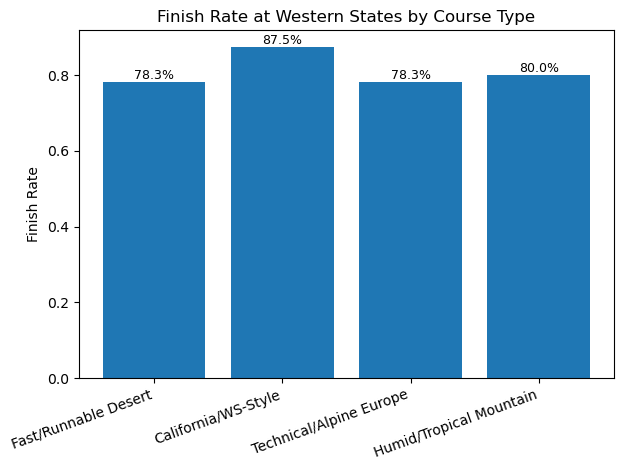

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 0) Load + course-type map
# =========================
df = pd.read_csv('../../data/master/excel_workbooks/gt_ws_perf_for_power_bi.csv')

course_map = {
    'Black Canyon': 'Fast/Runnable Desert',
    'Javelina': 'Fast/Runnable Desert',
    'Bandera': 'Fast/Runnable Desert',

    'Western States': 'California/WS-Style',
    'The Canyons': 'California/WS-Style',
    'Grindstone': 'California/WS-Style',

    'UTMB': 'Technical/Alpine Europe',
    'CCC': 'Technical/Alpine Europe',
    'Festival Des Templiers': 'Technical/Alpine Europe',
    'Nice Cote d Azur': 'Technical/Alpine Europe',

    'Doi Inthanon': 'Humid/Tropical Mountain',
    'Tarawera': 'Humid/Tropical Mountain',
    'Chianti (UTCC)': 'Humid/Tropical Mountain'
}
df['course_type'] = df['gt_race_name'].map(course_map)

# =========================================
# 1) Build normalized fractions on FULL df
#    (DNF/DNS will yield NaN ws_norm_frac)
# =========================================
# GT normalization: vs GT race + gender winner
df['gt_norm_frac'] = df.groupby(
    ['gt_race_name','gt_gender']
)['gt_time'].transform(lambda x: x / x.min())

# WS normalization: vs WS year + gender winner (finishers only)
finish_mask = df['ws_status'] == 'Finisher'
df.loc[finish_mask, 'ws_norm_frac'] = df[finish_mask].groupby(
    ['ws_year','gt_gender']
)['ws_time'].transform(lambda x: x / x.min())

df = df.replace([np.inf, -np.inf], np.nan)

# ===================================
# 2) Per-course-type performance stats
# ===================================
finishers = df[df['ws_status'] == 'Finisher'].copy()
finishers['delta'] = finishers['ws_norm_frac'] - finishers['gt_norm_frac']
finishers['ws_top10pct'] = finishers['ws_norm_frac'] <= 1.05

group_perf = (
    finishers.groupby('course_type')
        .agg(
            n_finishers=('gt_normalized_name','count'),
            median_delta=('delta','median'),
            pct_top10pct=('ws_top10pct','mean')
        )
)

# ================================
# 3) Completion stats (incl. DNF)
# ================================
group_completion = (
    df.groupby('course_type')
      .agg(
          total=('gt_normalized_name','count'),
          finishers=('ws_status', lambda x: (x=='Finisher').sum()),
          dnfs=('ws_status', lambda x: (x=='DNF').sum()),
          dns=('ws_status', lambda x: (x=='DNS').sum())
      )
)

summary = group_completion.join(group_perf)
summary['finish_rate'] = summary['finishers'] / summary['total']
summary = summary.sort_values('total', ascending=False)

print(summary)

# Helper for labels
def _add_bar_labels(ax, fmt="{:.1f}%"):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(fmt.format(height*100 if height <= 1.0 else height),
                    xy=(p.get_x() + p.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# ==============================================
# 4) Chart A — Median slowdown by course type
#     (Δ = WS_norm − GT_norm ; lower is better)
# ==============================================
plot_df = summary[['median_delta','n_finishers']].dropna().copy()
x = plot_df.index.tolist()
y = plot_df['median_delta'].values
n = plot_df['n_finishers'].values

plt.figure()
ax = plt.bar(x, y)
plt.title("Median Slowdown from GT → WS by Course Type\n(lower is better)")
plt.ylabel("Median Δ (normalized frac)")
plt.xticks(rotation=20, ha='right')

# add numeric labels above bars
for rect, val in zip(ax, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
             f"{val:.3f}", ha='center', va='bottom', fontsize=9)

# add n labels under x-axis names
for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_text(f"{label.get_text()}\n(n={int(n[i])})")
plt.gca().set_xticklabels(plt.gca().get_xticklabels())
plt.tight_layout()
plt.show()

# ===========================================
# 5) Chart B — % Top-10% WS finishers by type
# ===========================================
plot_df = summary[['pct_top10pct','n_finishers']].dropna().copy()
x = plot_df.index.tolist()
y = plot_df['pct_top10pct'].values
n = plot_df['n_finishers'].values

plt.figure()
bars = plt.bar(x, y)
plt.title("Share of Finishers in Top 5% at WS by Course Type\n(higher is better)")
plt.ylabel("Top 10% Finishers (share)")
plt.xticks(rotation=20, ha='right')

# labels
for rect, val in zip(bars, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
             f"{val*100:.1f}%", ha='center', va='bottom', fontsize=9)
for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_text(f"{label.get_text()}\n(n={int(n[i])})")
plt.gca().set_xticklabels(plt.gca().get_xticklabels())
plt.tight_layout()
plt.show()

# =====================================
# 6) Chart C — Finish rate by type
# =====================================
plot_df = summary[['finish_rate','total']].dropna().copy()
x = plot_df.index.tolist()
y = plot_df['finish_rate'].values
n = plot_df['total'].values

plt.figure()
bars = plt.bar(x, y)
plt.title("Finish Rate at Western States by Course Type")
plt.ylabel("Finish Rate")
plt.xticks(rotation=20, ha='right')

# labels
for rect, val in zip(bars, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
             f"{val*100:.1f}%", ha='center', va='bottom', fontsize=9)
for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_text(f"{label.get_text()}\n(N={int(n[i])})")
plt.gca().set_xticklabels(plt.gca().get_xticklabels())
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_36504\1596395708.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(plt.gca().get_xticklabels())


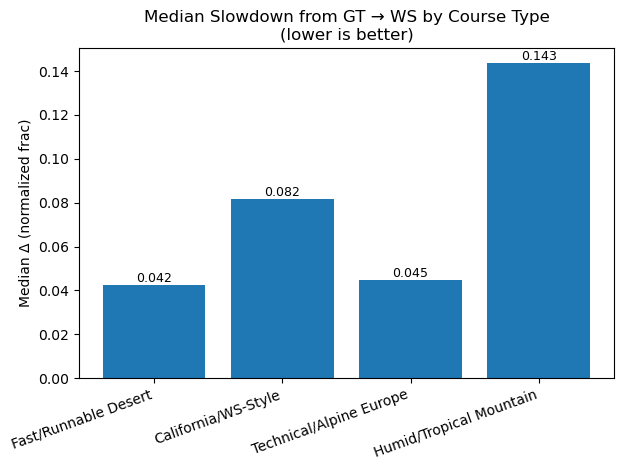

In [155]:
# ==============================================
# 4) Chart A — Median slowdown by course type
#     (Δ = WS_norm − GT_norm ; lower is better)
# ==============================================
plot_df = summary[['median_delta','n_finishers']].dropna().copy()
x = plot_df.index.tolist()
y = plot_df['median_delta'].values
n = plot_df['n_finishers'].values

plt.figure()
ax = plt.bar(x, y)
plt.title("Median Slowdown from GT → WS by Course Type\n(lower is better)")
plt.ylabel("Median Δ (normalized frac)")
plt.xticks(rotation=20, ha='right')

# add numeric labels above bars
for rect, val in zip(ax, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
             f"{val:.3f}", ha='center', va='bottom', fontsize=9)

# add n labels under x-axis names
for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_text(f"{label.get_text()}\n(n={int(n[i])})")
plt.gca().set_xticklabels(plt.gca().get_xticklabels())
plt.tight_layout()

# plt.savefig('../python_images/meadian_slowdown_from_gt_ws.png', dpi = 300)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23612\2634644391.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(plt.gca().get_xticklabels())


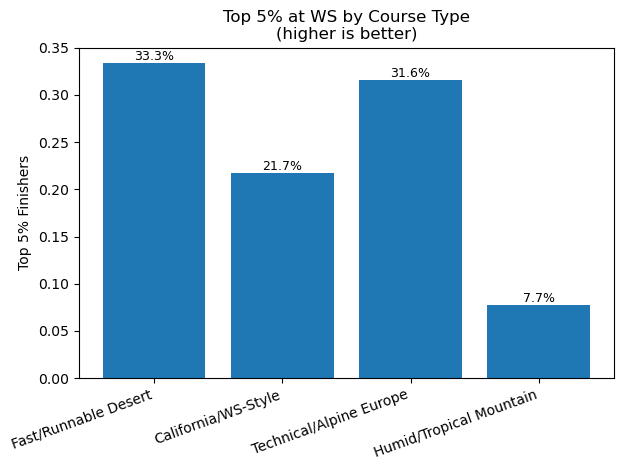

In [31]:
# ===========================================
# 5) Chart B — % Top-10% WS finishers by type
# ===========================================
plot_df = summary[['pct_top10pct','n_finishers']].dropna().copy()
x = plot_df.index.tolist()
y = plot_df['pct_top10pct'].values
n = plot_df['n_finishers'].values

plt.figure()
bars = plt.bar(x, y)
plt.title("Top 5% at WS by Course Type\n(higher is better)")
plt.ylabel("Top 5% Finishers")
plt.xticks(rotation=20, ha='right')

# labels
for rect, val in zip(bars, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
             f"{val*100:.1f}%", ha='center', va='bottom', fontsize=9)
for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_text(f"{label.get_text()}\n(n={int(n[i])})")
plt.gca().set_xticklabels(plt.gca().get_xticklabels())
plt.tight_layout()

plt.savefig('../python_images/share_of_finishers_in_top_5%.png', dpi = 300)

plt.show()

In [165]:

df = pd.read_csv('../../data/master/golden_ticket_recipient_master_table.csv')
print(df.columns)

Index(['Race_ID', 'Gender', 'Ticket_Position', 'Name', 'Gender_Rank',
       'WS_Year', 'WS_ID', 'Finisher_Flag', 'DNF_Flag', 'DNS_Flag'],
      dtype='object')


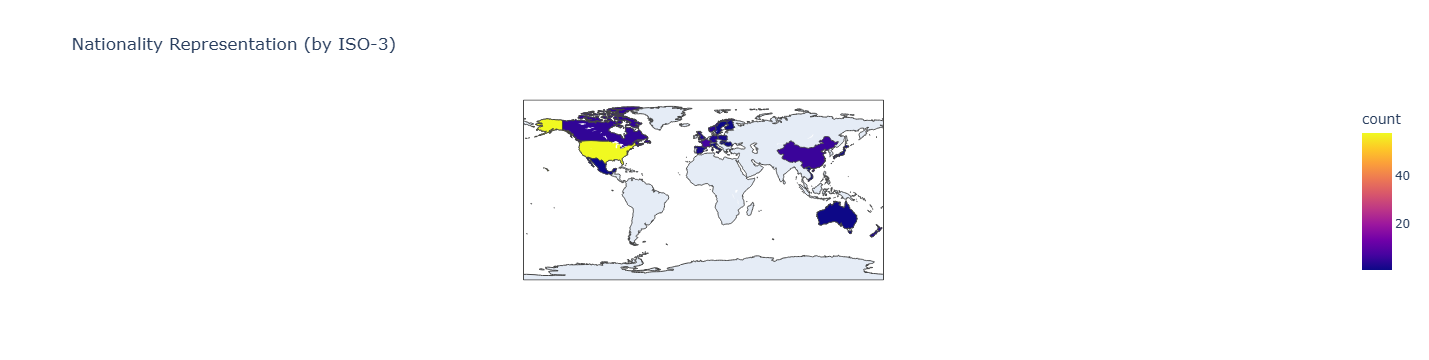

In [171]:
# 2) Find the nationality-like column
cands = ['nationality','country','nation','citizenship','iso3','iso_a3']
col = next((c for c in df.columns if c in cands), None)
if col is None:
    raise ValueError(f"No nationality-like column found. Got: {list(df.columns)}")

# 3) Map to ISO3 if needed
def to_iso3(val):
    if pd.isna(val): return None
    s = str(val).strip()
    if len(s) == 3 and s.isalpha():
        return s.upper()
    try:
        import pycountry
        return pycountry.countries.lookup(s).alpha_3
    except Exception:
        # quick aliases for common edge cases
        aliases = {
            'uk':'GBR','u.k.':'GBR','united kingdom':'GBR',
            'usa':'USA','u.s.':'USA','us':'USA','united states':'USA',
            'czech republic':'CZE','russia':'RUS','south korea':'KOR',
            'north korea':'PRK','hong kong':'HKG','taiwan':'TWN',
        }
        return aliases.get(s.lower())

df['iso3'] = df[col].apply(to_iso3)
nat_counts = (df['iso3']
              .dropna()
              .value_counts()
              .rename_axis('iso3')
              .reset_index(name='count'))

fig = px.choropleth(
    nat_counts,
    locations="iso3",
    locationmode="ISO-3",
    color="count",
    title="Nationality Representation (by ISO-3)"
)
fig.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [6]:
df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

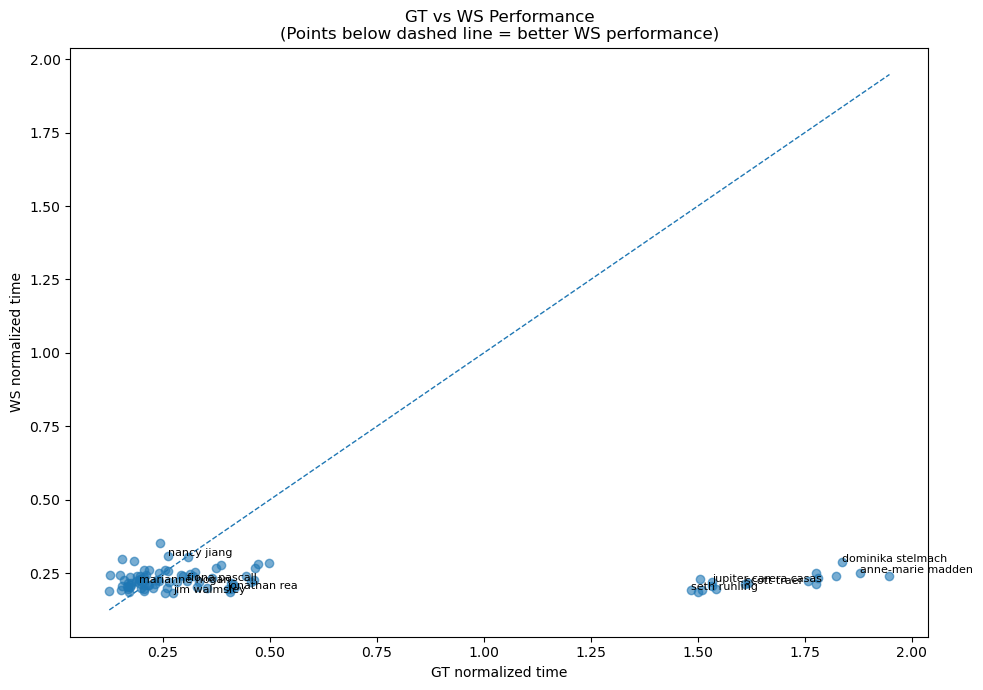

NameError: name 'r' is not defined

In [9]:
finishers = df[df['ws_status']=="Finisher"].copy()

# Scatter
plt.figure(figsize=(10,7))
plt.scatter(finishers['gt_norm'], finishers['ws_norm'], alpha=0.6)

# # Trend line
# slope, intercept, r, p, stderr = linregress(finishers['gt_norm_frac'], finishers['ws_norm_frac'])
# x_fit = np.linspace(finishers['gt_norm_frac'].min(), finishers['gt_norm_frac'].max(), 200)
# y_fit = intercept + slope * x_fit
# plt.plot(x_fit, y_fit, linewidth=2)

# Reference line y=x
lo = min(finishers['gt_norm'].min(), finishers['ws_norm'].min())
hi = max(finishers['gt_norm'].max(), finishers['ws_norm'].max())
plt.plot([lo,hi], [lo,hi], linestyle='--', linewidth=1)

# # --- Highlight over/under performers ---
over = finishers[finishers['gt_norm'] < 0.5]
under = finishers[finishers['gt_norm'] > 1.25]

# Label a few outliers (avoid clutter)
for _, row in over.sample(min(5, len(over))).iterrows():
    plt.text(row['gt_norm'], row['ws_norm'], row['gt_normalized_name'], fontsize=8)

for _, row in under.sample(min(5, len(under))).iterrows():
    plt.text(row['gt_norm'], row['ws_norm'], row['gt_normalized_name'], fontsize=8)

plt.title("GT vs WS Performance\n(Points below dashed line = better WS performance)")
plt.xlabel("GT normalized time")
plt.ylabel("WS normalized time")
plt.tight_layout()

# plt.savefig('../python_images/gt_ws_scatter_normalized.png', dpi = 300)

plt.show()

print(f"Correlation r={r:.3f}, p={p:.003f}")

In [10]:
import pandas as pd
import numpy as np

def to_seconds(x):
    """
    Accepts HH:MM:SS strings, pandas Timedelta, or numeric seconds.
    Returns numeric seconds (float).
    """
    if pd.isna(x):
        return np.nan
    # already numeric
    if isinstance(x, (int, float, np.number)):
        return float(x)
    # timedelta-like
    if isinstance(x, pd.Timedelta):
        return x.total_seconds()
    # string like '9:23:52' or '09:23:52'
    try:
        parts = str(x).split(':')
        if len(parts) == 3:
            h, m, s = map(float, parts)
            return h*3600 + m*60 + s
        # fallback: try pandas to_timedelta
        return pd.to_timedelta(x).total_seconds()
    except Exception:
        return np.nan

In [13]:
df_master = pd.read_csv('../../data/master/excel_workbooks/race_results_master_for_power_bi.csv')  # your load
df_master['time_seconds'] = df_master['time'].apply(to_seconds)

# Optional: derive year if you only have a date
# df_master['year'] = pd.to_datetime(df_master['race_date']).dt.year

# Filter finishers only
finishers = df_master[df_master['status'].str.lower().eq('finisher')].copy()

# Median per (race_id, year, gender)
med = (finishers
       .groupby(['race_id','year','gender'], as_index=False)
       .agg(race_gender_median_sec=('time_seconds','median'),
            race_gender_n=('time_seconds','size'))
      )

In [15]:
gtws = pd.read_csv('../../data/master/excel_workbooks/gt_ws_perf_for_power_bi.csv')  # path you mentioned
gtws['gt_time_sec'] = gtws['gt_time'].apply(to_seconds)
gtws['ws_time_sec'] = gtws['ws_time'].apply(to_seconds)

# 3a) Join GT medians
gtws = gtws.merge(
    med.rename(columns={'race_id':'gt_race_id','year':'gt_year','gender':'gt_gender'}),
    on=['gt_race_id','gt_gender'], how='left'
)

# If you have a GT year column, include it in the key:
# on=['gt_race_id','gt_year','gt_gender']

gtws = gtws.rename(columns={
    'race_gender_median_sec': 'gt_median_sec',
    'race_gender_n': 'gt_field_n'
})

# 3b) Join WS medians (note: gender comes from gt_gender)
gtws = gtws.merge(
    med.rename(columns={'race_id':'ws_race_id','year':'ws_year','gender':'gt_gender'}),
    on=['ws_race_id','ws_year','gt_gender'], how='left'
)

gtws = gtws.rename(columns={
    'race_gender_median_sec': 'ws_median_sec',
    'race_gender_n': 'ws_field_n'
})

In [16]:
gtws['gt_norm_med_frac'] = gtws['gt_time_sec'] / gtws['gt_median_sec']
gtws['ws_norm_med_frac'] = gtws['ws_time_sec'] / gtws['ws_median_sec']

# Useful deltas for slides:
gtws['delta_med_frac'] = gtws['ws_norm_med_frac'] - gtws['gt_norm_med_frac']
# Negative = performed (relative to field) better at WS than at the GT race

In [17]:
gtws

,gt_race_id,gt_series_id,gt_race_date,gt_diff_index,gt_race_name,gt_normalized_name,gt_gender,ticket_position,gt_time,ws_series_id,...,gt_time_sec,ws_time_sec,gt_year,gt_median_sec,gt_field_n,ws_median_sec,ws_field_n,gt_norm_med_frac,ws_norm_med_frac,delta_med_frac
0,62321,623,2021-10-22,52.9,Festival Des Templiers,anne-lise le quere,F,2,0.537396,17002,...,0.537396,1.146690,2021,0.831053,47,1.136389,69,0.646644,1.009065,0.362420
1,22,50001,2022-01-08,25.4,Bandera,marianne hogan,F,1,0.386875,17002,...,0.386875,0.754028,2022,0.653194,70,1.136389,69,0.592282,0.663530,0.071248
2,14221,142,2021-08-27,100.0,UTMB,ludovic pommeret,M,1,0.901898,17002,...,0.901898,0.680579,2021,1.734705,1410,1.104311,236,0.519914,0.616292,0.096378
3,37542,3753,2022-04-23,50.6,The Canyons,aroa sio seijo,F,3,0.435891,17002,...,0.435891,0.846146,2022,0.659294,91,1.136389,69,0.661148,0.744592,0.083443
4,14222,142,2022-08-26,100.0,UTMB,mathieu blanchard,M,1,0.829745,17002,...,0.829745,0.650718,2022,1.674641,1651,1.129155,260,0.495477,0.576287,0.080811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,90708,12057,2022-10-29,31.6,Javelina,devon yanko,F,1,NaN,17002,...,NaN,NaN,2022,1.099907,155,1.157998,67,NaN,NaN,NaN
109,37338,37038,2023-09-23,70.9,Grindstone,devon yanko,F,2,NaN,17002,...,NaN,NaN,2023,0.651759,57,1.120955,62,NaN,NaN,NaN
110,115592,10254,2025-02-08,5.0,Black Canyon,will murray,M,2,NaN,17002,...,NaN,NaN,2025,0.616956,549,1.094520,210,NaN,NaN,NaN
111,115592,10254,2025-02-08,5.0,Black Canyon,lin chen,F,2,NaN,17002,...,NaN,NaN,2025,0.645475,227,1.139236,75,NaN,NaN,NaN


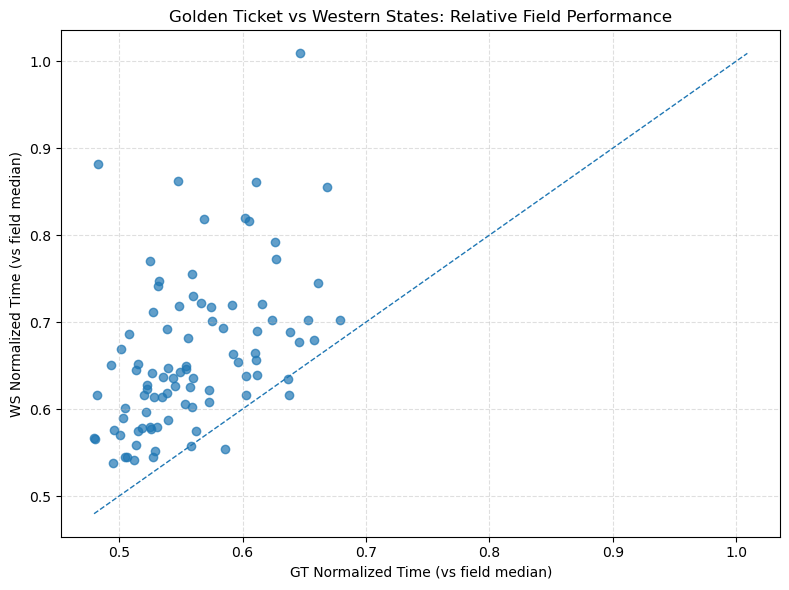

In [27]:
lo = min(gtws['gt_norm_med_frac'].min(), gtws['ws_norm_med_frac'].min())
hi = max(gtws['gt_norm_med_frac'].max(), gtws['ws_norm_med_frac'].max())
# plt.plot([lo,hi], [lo,hi], linestyle='--', linewidth=1)


plt.figure(figsize=(8,6))
plt.scatter(gtws['gt_norm_med_frac'], gtws['ws_norm_med_frac'], alpha=0.7)
# plt.plot([0.6,1.4],[0.6,1.4],'--',color='gray')  # reference line
plt.plot([lo,hi], [lo,hi], linestyle='--', linewidth=1)
plt.xlabel('GT Normalized Time (vs field median)')

# # Label a few outliers (avoid clutter)
# for _, row in over.sample(min(5, len(over))).iterrows():
#     plt.text(row['gt_norm_med_frac'], row['ws_norm_med_frac'], row['gt_normalized_name'], fontsize=8)

# for _, row in under.sample(min(5, len(under))).iterrows():
#     plt.text(row['gt_norm_med_frac'], row['ws_norm_med_frac'], row['gt_normalized_name'], fontsize=8)

plt.ylabel('WS Normalized Time (vs field median)')
plt.title('Golden Ticket vs Western States: Relative Field Performance')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

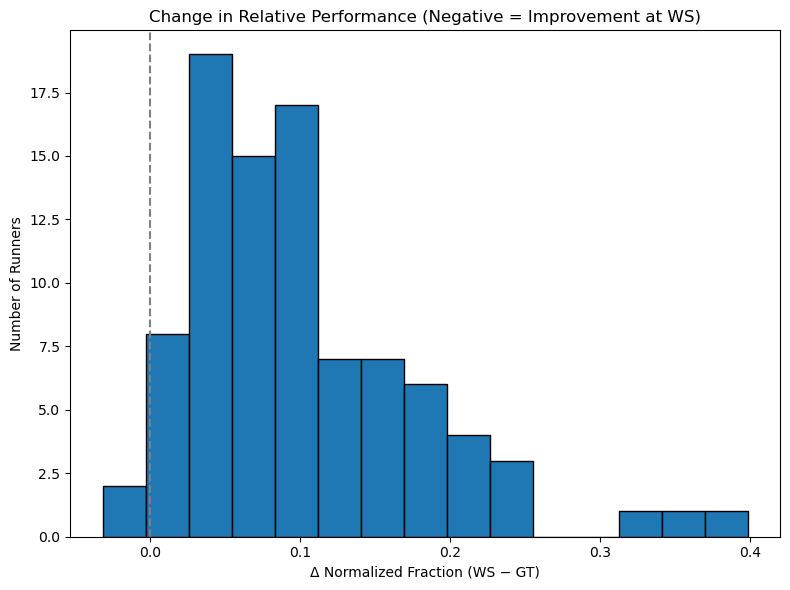

In [19]:
plt.figure(figsize=(8,6))
plt.hist(gtws['delta_med_frac'], bins=15, edgecolor='black')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Δ Normalized Fraction (WS − GT)')
plt.ylabel('Number of Runners')
plt.title('Change in Relative Performance (Negative = Improvement at WS)')
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

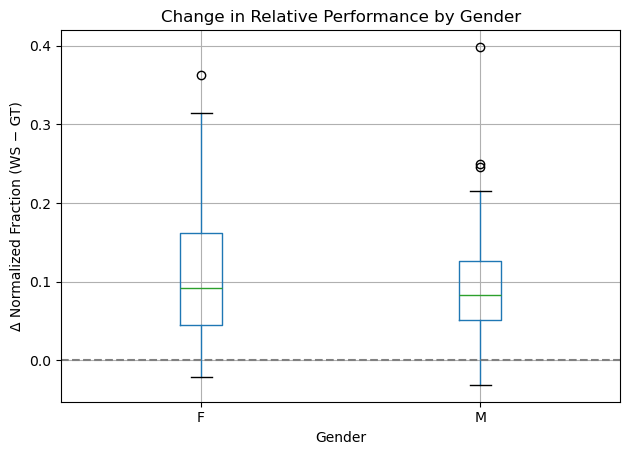

In [20]:
plt.figure(figsize=(7,6))
gtws.boxplot(column='delta_med_frac', by='gt_gender')
plt.axhline(0, color='gray', linestyle='--')
plt.suptitle('')
plt.title('Change in Relative Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Δ Normalized Fraction (WS − GT)')
plt.tight_layout()
plt.show()